In [1]:
from qiskit import QuantumCircuit, Aer
from qiskit.quantum_info import random_unitary
from qiskit.visualization import array_to_latex, plot_histogram

Przy pomocy biblioteki Qiskit można uruchamiać programy w dwojaki sposób:
- na prawdziwym komputerze kwantowym przez platformę IBM (https://quantum.ibm.com/)
- przy pomocy symulatorów, które odtwarzają w przybliżony sposób zachowanie prawdziwego komputera kwantowego.  

Symulatory są dostępne w paczce Qiskit Aer. Poniżej wyświetlimy listę lokalnie dostępnych symulatorów.

In [2]:
# Wyświetlenie dostępnych backendów do symulacji:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

### Unitary Simulator
Symulator *Unitary Simulator* służy do reprezentowania bramek w ich postaci macierzowej (jako operatory unitarne - macierze unitarne - stąd nazwa). Działanie całego obwodu złożonego z wielu bramek można opisać jednym operatorem unitarnym - symulator Unitary pozwala wyświetlić postać tego operatora. Poniżej zobaczymy jego działanie dla przykładowego obwodu.   

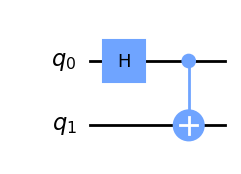

In [3]:
# Definiujemy obwód kwantowy złożony z dwóch kubitów. 
# Nie mamy potrzeby wykonywać tutaj żadnych pomiarów, stąd nie potrzeba bitów klasycznych.
# Następnie dodajemy do niego dwie bramki - Hadamarda w działaniu na 1 kubit oraz CNOT.

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.draw('mpl')

In [4]:
# Wybieramy symulator - "Unitary simulator"
unitary_simulator = Aer.get_backend('unitary_simulator')       

# Przeprowadzamy symulację i odczytujemy wynik
unitary_simulator_result = unitary_simulator.run(circuit).result()
unitary_simulator_result.data()

{'unitary': Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
             0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
           [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
             0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
           [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
             0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
           [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j,
             0.        +0.00000000e+00j,  0.        +0.00000000e+00j]],
          input_dims=(2, 2), output_dims=(2, 2))}

Wynikiem jest operator opisujący przekształcenia wykonywane przez cały obwód, przedstawiony w reprezentacji macierzowej. Możemy wyświetlić go w postaci macierzy, korzystając z funkcji  `array_to_latex`.

In [5]:
array_to_latex(unitary_simulator_result.get_unitary())

<IPython.core.display.Latex object>

In [6]:
circuit = QuantumCircuit(2)
circuit.set_unitary(random_unitary(4))
circuit.h(0)
circuit.cx(0, 1)
unitary_simulator_result = unitary_simulator.run(circuit).result()
unitary_simulator_result.get_unitary()

Operator([[ 0.38029138+0.48013457j, -0.75398276-0.09833324j,
            0.16991904-0.11755237j, -0.06140479-0.01510787j],
          [-0.50909224+0.21907228j, -0.06345678+0.28200967j,
            0.11687979-0.60818787j,  0.28113332+0.38299724j],
          [-0.39385453-0.20568854j, -0.52559392+0.02467264j,
           -0.66498347+0.26411724j, -0.00787728+0.11700488j],
          [ 0.3049095 -0.1651748j , -0.00976676-0.24765149j,
            0.05573966+0.24225553j,  0.66624625+0.55914409j]],
         input_dims=(2, 2), output_dims=(2, 2))

### Statevector Simulator

Symulator *Statevector Simulator* daje dostęp do stanu układu w postaci wektora.  
Od wersji Qiskit 1.0 jest też możliwość wyświetlania stanu przy pomocy klasy `Statevector` z modułu `qiskit.quantum_info`. Zostanie ona przedstawiona w notatniku `02_stany_kwantowe.ipynb`.  

In [7]:
# Ponownie definiujemy obwód kwantowy złożony z dwóch kubitów. 
# Tak jak wyżej - nie mamy potrzeby wykonywać tutaj żadnych pomiarów, stąd nie potrzeba bitów klasycznych.
# Następnie dodajemy do niego dwie bramki - Hadamarda w działaniu na 1 kubit oraz CNOT.

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)

statevector_simulator = Aer.get_backend('statevector_simulator')
statevector_simulator_result = statevector_simulator.run(circuit).result()
statevector_simulator_result.data()

{'statevector': Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
              0.70710678+0.j],
             dims=(2, 2))}

Wynikiem jest wektor opisujący stan układu po przejściu przez cały obwód kwantowy.  

In [8]:
array_to_latex(statevector_simulator_result.get_statevector())

<IPython.core.display.Latex object>

### QASM Simulator  
Symulator *QASM* symuluje wykonywanie pomiarów na rzeczywistym komputerze kwantowym. Domyślnie symuluje on pomiary na idealnym komputerze kwantowym - bez szumu czy dekoherencji.   

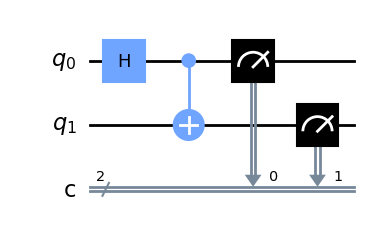

In [9]:
# Definiujemy obwód z dwoma kubitami. 
# Tutaj już będziemy wykonywać pomiary (z racji, że chcemy symulować rzeczywiste urządzenie),
# więc dodajemy dwa bity klasyczne na zapisanie wyników pomiarów.

circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])
circuit.draw('mpl')

In [10]:
qasm_simulator = Aer.get_backend('qasm_simulator')
qasm_simulator_result = qasm_simulator.run(circuit).result()
qasm_simulator_result.get_counts()

{'00': 504, '11': 520}

Standardowo wynikiem symulacji jest słownik Python. Można zwizualizować wyniki histogramem:

plot_histogram(qasm_simulator_result.get_counts())

### Uwaga na temat pomiarów
W Qiskit dostępne są dwie metody wprowadzania pomiaru w układzie.  
Dotychczas używaliśmy `.measure()`, w którym trzeba najpierw zdefiniować bity kwantowe oraz klasyczne w układzie i przekazać dla każdego kubitu, w którym bicie klasycznym będzie trzymany wynik jego pomiaru.   

Istnieje też skrócona wersja - metoda `.measure_all()`. Ta metoda samodzielnie "tworzy" bity klasyczne i automatycznie zapisuje pomiar każdego kubitu w klasycznym bicie o tym samym indeksie. Dodatkowo dodaje graficzne oddzielenie (tzw. *barrier*) przed częścią obwodu odpowiedzialną za pomiary.  

W dwóch poniższych komórkach znajduje się kod, który w każdej komórce robi dokładnie to samo, ale w pierwszej korzystając z metody `.measure()`, a w drugiej przy pomocy `.measure_all()`. 

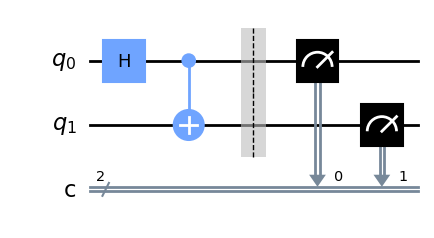

In [11]:
qc = QuantumCircuit(2, 2)   # Jeśli chcemy używać measure(), 
                            # musimy zdefiniować na początku zarówno kubity
                            # jak i bity klasyczne w układzie
qc.h(0)
qc.cx(0, 1)

qc.barrier()                # Barrier - graficzne oddzielenie różnych fragmentów obwodu
qc.measure([0,1], [0,1])    # W measure() jako argumenty musimy podać zarówno mierzone kubity,
                            # jak i klasyczne bity na których zapisane zostaną wyniki pomiarów.
    
qc.draw(output="mpl")

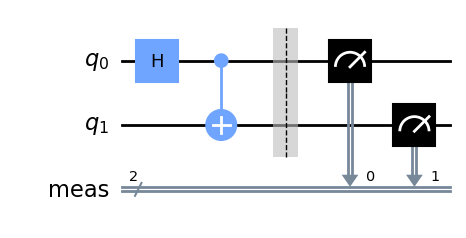

In [12]:
qc = QuantumCircuit(2)      # Jeśli chcemy używać measure_all(), 
                            # definiujemy tylko kubity w układzie.
                            # Nie przejmujemy się na początku bitami klasycznymi.
qc.h(0)
qc.cx(0, 1)

qc.measure_all()    # W measure_all() nie podajemy argumentów. Zmierzone zostaną
                    # wszystkie kubity, a wyniki pomiarów zostaną zapisane automatycznie 
                    # na bitach klasycznych o tym samym indeksie, co indeks kubitu.

qc.draw(output="mpl")